## 1. Read Data


In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame= False)

#### Structure of the data

In [13]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [16]:
mnist.data.shape

(70000, 784)

In [17]:
mnist.target.shape

(70000,)

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

## 2. Data Preprocessing

In [18]:
X, y = mnist["data"], mnist["target"]

In [19]:
X.shape

(70000, 784)

In [20]:
y.shape

(70000,)

In [21]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Visualizando

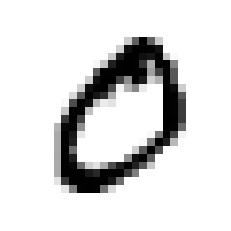

In [22]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = X[1]
any_digit_image = un_numero.reshape(28,28)
plt.imshow(any_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

El target dice:

In [23]:
y[1]

'0'

Training y test set:

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [25]:
y_test.shape

(10000,)

In [26]:
y_train.shape

(60000,)

## 3. Model Creation

Model #1 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)

Model #2 Support Vector Machine (SVM)

In [18]:
from sklearn import svm
SVM = svm.SVC()

Model #3 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [48]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

Model #5 Convolutional Neural Network (CNN) ** todavía no probado

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Expand dmension of image to 28,28,1
X_trainCNN = np.expand_dims(X_train, -1)
X_testCNN = np.expand_dims(X_test, -1)

#convert classes to one hot vectors
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)

CNN = Sequential()

CNN.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1), activation='relu'))

CNN.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1), activation='relu'))

CNN.add(Flatten())
CNN.add(Dropout(0.25))
CNN.add(Dense(10, activation='softmax'))

CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])


(60000, 784, 1)

## 4. Training: Adjust Model with Historic Data

Model #1 Logistic Regression

In [24]:
LR.fit(X_train, y_train)

C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000)

Model #2 Support Vector Machine (SVM)

In [22]:
SVM.fit(X_train, y_train)

SVC()

Model #3 Random Forest ** busca que significa y

In [29]:
RFC = RFC.fit(X_train, y_train)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [51]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15), random_state=1)
MLP.fit(X_train, y_train)

C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=15, random_state=1,
              solver='lbfgs')

Model #5 Convolutional Neural Network (CNN)

In [72]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

his = model.fit(X_trainCNN, y_trainCNN, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5


ValueError: in user code:

    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_14 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 784, 1]


## 5. Prediction for New Data

Model #1 Logistic Regression

In [74]:
y_predictLR = LR.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [31]:
y_test[:7]

60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [75]:
y_predictLR[:7]

NameError: name 'y_predictLR' is not defined

Model #2 Support Vector Machine (SVM)

In [76]:
y_predictSVM = SVM.predict(X_test)

In [77]:
y_test[:15]

60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
60007    9
60008    5
60009    9
60010    0
60011    6
60012    9
60013    0
60014    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [78]:
y_predictSVM[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '6', '9', '0', '6', '9',
       '0', '1'], dtype=object)

Model #3 Random Forest

In [79]:
y_predictRFC = RFC.predict(X_test)

In [80]:
y_test[:15]

60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
60007    9
60008    5
60009    9
60010    0
60011    6
60012    9
60013    0
60014    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [81]:
y_predictRFC[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [82]:
y_predictMLP = MLP.predict(X_test)

In [83]:
y_test[:20]

60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
60007    9
60008    5
60009    9
60010    0
60011    6
60012    9
60013    0
60014    1
60015    5
60016    9
60017    7
60018    3
60019    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [84]:
y_predictMLP[:20]

array(['7', '6', '1', '6', '4', '1', '6', '9', '6', '7', '6', '6', '7',
       '6', '1', '6', '9', '7', '6', '9'], dtype='<U1')

Model #5 Convolutional Neural Network (CNN)

# 6. Visualization of Results

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Model #1 Logistic Regression

In [85]:
cross_val_score(LR, X_train, y_train, cv=3, scoring = "accuracy")

C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

array([0.90265, 0.90535, 0.9075 ])

In [87]:
accuracy_score(y_test,y_predictLR)

NameError: name 'y_predictLR' is not defined

Model #2 Support Vector Machine (SVM)

In [88]:
cross_val_score(SVM, X_train, y_train, cv=3, scoring = "accuracy")

array([0.977 , 0.9738, 0.9739])

In [89]:
accuracy_score(y_test,y_predictSVM)

0.9792

Model #3 Random Forest

In [90]:
cross_val_score(RFC, X_train, y_train, cv=3, scoring = "accuracy")

array([0.9431, 0.9369, 0.9438])

In [91]:
accuracy_score(y_test,y_predictRFC)

0.9489

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [92]:
cross_val_score(MLP, X_train, y_train, cv=3, scoring = "accuracy")

array([0.11235, 0.11235, 0.1124 ])

In [93]:
accuracy_score(y_test,y_predictMLP)

0.4136

Model #5 Convolutional Neural Network (CNN)

In [ ]:
cross_val_score(CNN, X_train, y_train, cv=3, scoring = "accuracy")

In [ ]:
accuracy_score(y_test,y_predictCNN)